<a href="https://colab.research.google.com/github/Lesiazhou/QM2/blob/qm2-groupwork/Simple_water_characteristics_vs_NDVI%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aral sea morphometric characteristics---water volume + water surface area + water volume (1981-2004) vs NDVI**

# Introduction to the Aral Sea Dataset

This dataset provides detailed information about the Aral Sea from 1981 to 2004, capturing key characteristics such as water level (measured in meters), water surface area (in thousand square kilometers), and water volume (in cubic kilometers). The dataset offers insights into the significant environmental changes that occurred during this period, particularly the shrinking of the Aral Sea.

From 1986 onwards, the Aral Sea split into two distinct parts: the Southern Aral Sea (Big Aral) and the Northern Aral Sea (North Sea). To account for this division:

The water surface area and water volume from 1986 to 2004 represent the combined totals of the Big Aral and North Sea.
The water level values for this period have been averaged between the two seas to provide a unified representation of the Aral Sea's state.
This dataset reflects the drastic ecological changes in the region and can be used for analyzing the causes and impacts of the Aral Sea's transformation, such as desertification, water resource management, and regional agricultural productivity.

# 1. Summary Statistics

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Aral_Sea_Characteristics__1981-2004_.csv to Aral_Sea_Characteristics__1981-2004_.csv


In [ ]:
import ee
import pandas as pd
import numpy as np
from datetime import datetime
df1=pd.read_csv('Aral_Sea_Characteristics__1981-2004_.csv')
df1 = df1.iloc[1:]
df1.head(10)

,Year,Water Level (m),Water Surface Area (thousand km²),Water Volume (km³)
1,1982,44.39,47.13,578.65
2,1983,43.55,46.07,532.58
3,1984,42.75,44.92,487.66
4,1985,41.94,43.08,444.58
5,1986,40.96,41.39,403.10
6,1987,40.49,39.94,365.56
7,1988,40.08,38.93,334.49
8,1989,39.65,38.01,327.20
9,1990,39.37,36.42,302.28
10,1991,39.03,34.75,278.08


In [ ]:
summary=df1.describe()
summary=summary.T
summary

,count,mean,std,min,25%,50%,75%,max
Year,23.0,1993.000000,6.782330,1982.00,1987.500,1993.00,1998.500,2004.00
Water Level (m),23.0,38.939130,2.556919,35.39,37.320,38.50,40.285,44.39
Water Surface Area (thousand km²),23.0,33.556957,8.319927,19.21,27.600,34.00,39.435,47.13
Water Volume (km³),23.0,282.281304,134.118796,115.85,177.555,250.13,350.025,578.65


# 2. Visualisation

<Figure size 1200x600 with 0 Axes>

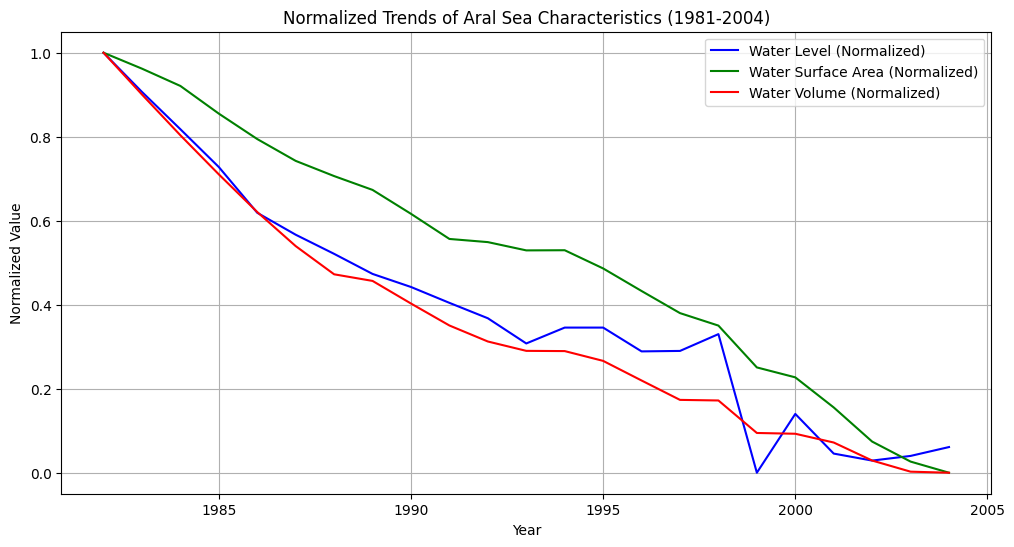

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

normalized_df = df1.copy()
for column in ["Water Level (m)", "Water Surface Area (thousand km²)", "Water Volume (km³)"]:
    normalized_df[column] = (df1[column] - df1[column].min()) / (df1[column].max() - df1[column].min())

plt.figure(figsize=(12, 6))
plt.plot(normalized_df["Year"], normalized_df["Water Level (m)"], label="Water Level (Normalized)", color="blue")
plt.plot(normalized_df["Year"], normalized_df["Water Surface Area (thousand km²)"], label="Water Surface Area (Normalized)", color="green")
plt.plot(normalized_df["Year"], normalized_df["Water Volume (km³)"], label="Water Volume (Normalized)", color="red")

plt.legend()
plt.title("Normalized Trends of Aral Sea Characteristics (1981-2004)")
plt.xlabel("Year")
plt.ylabel("Normalized Value")
plt.grid(True)
plt.show()

# 3. Assumption

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ndvi_calendar_part1.csv to ndvi_calendar_part1 (1).csv


In [ ]:
ndvi_df = pd.read_csv('ndvi_calendar_part1.csv')
ndvi_df.rename(columns={'year': 'Year'}, inplace=True)
merged_df = pd.merge(df1, ndvi_df, on="Year")
merged_df

,Year,Water Level (m),Water Surface Area (thousand km²),Water Volume (km³),Unnamed: 0,NDVI
0,1982,44.39,47.13,578.65,0,0.090632
1,1983,43.55,46.07,532.58,1,0.093746
2,1984,42.75,44.92,487.66,2,0.087002
3,1985,41.94,43.08,444.58,3,0.089661
4,1986,40.96,41.39,403.10,4,0.082829
5,1987,40.49,39.94,365.56,5,0.090683
6,1988,40.08,38.93,334.49,6,0.072781
7,1989,39.65,38.01,327.20,7,0.068782
8,1990,39.37,36.42,302.28,8,0.085278
9,1991,39.03,34.75,278.08,9,0.087681


# A. Independence


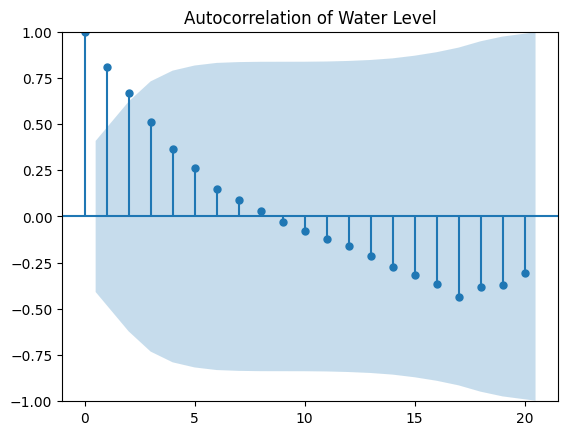

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(merged_df['Water Level (m)'], lags=20)
plt.title('Autocorrelation of Water Level')
plt.show()

Since the data is arranged in a time series format, it inherently lacks independence.Observations at one time point are likely influenced by those from preceding or subsequent time points. This is confirmed by the autocorrelation plot for Water Level, which shows significant positive autocorrelation at early lags, indicating strong temporal dependence.

# B. Homoscedasticity

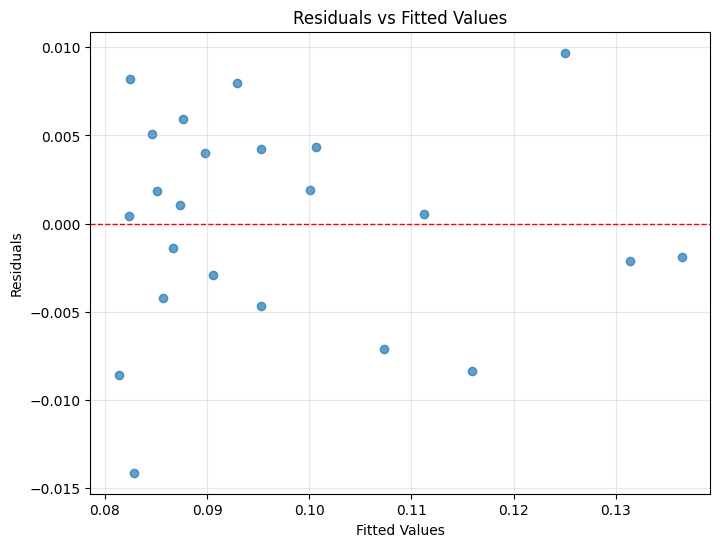

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

X = merged_df[['Water Level (m)', 'Water Surface Area (thousand km²)', 'Water Volume (km³)']]
y = merged_df['NDVI']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

fitted_values = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(alpha=0.3)
plt.show()

Plot Analyzed: Residuals vs. Fitted Values
The residual plot shows a potential pattern where residuals are not randomly distributed around zero. Specifically, the variance of residuals appears to change across different fitted values, with a concentration of smaller residuals at higher fitted values. This suggests heteroscedasticity, where the assumption of constant variance (homoscedasticity) is violated.

## **Implication:**

The homoscedasticity assumption is not satisfied.
This violation could affect the accuracy of significance tests and standard errors. Using robust standard errors or a log transformation might stabilize the variance and address this issue.

# C. Multicollinearity

In [ ]:
corr_matrix = merged_df[['Water Level (m)', 'Water Surface Area (thousand km²)', 'Water Volume (km³)']].corr()
print(corr_matrix)

                                   Water Level (m)  \
Water Level (m)                           1.000000   
Water Surface Area (thousand km²)         0.962415   
Water Volume (km³)                        0.985342   

                                   Water Surface Area (thousand km²)  \
Water Level (m)                                             0.962415   
Water Surface Area (thousand km²)                           1.000000   
Water Volume (km³)                                          0.962604   

                                   Water Volume (km³)  
Water Level (m)                              0.985342  
Water Surface Area (thousand km²)            0.962604  
Water Volume (km³)                           1.000000  


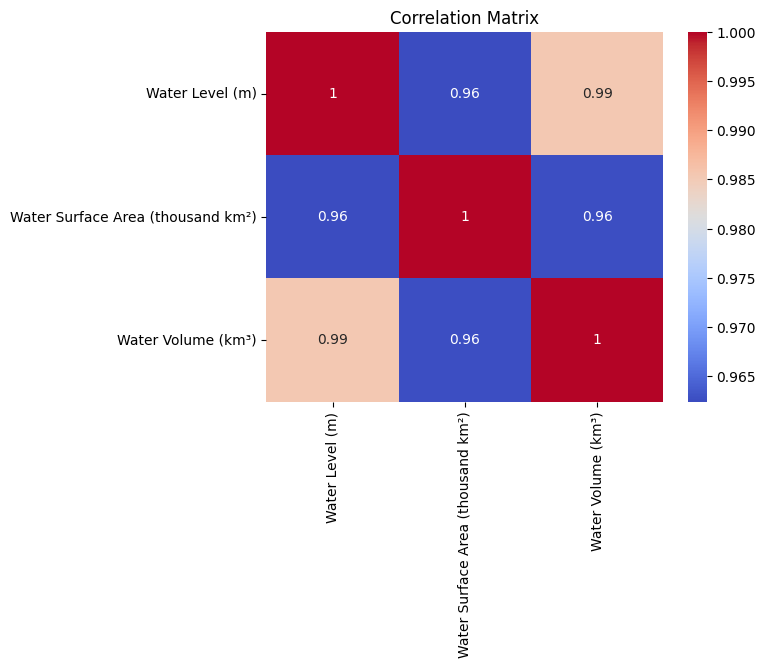

In [ ]:
import seaborn as sns

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

This indicates severe multicollinearity, meaning the three predictors are highly interdependent. This violates the multicollinearity assumption and could lead to unstable regression coefficients and inflated standard errors.

# 4a. Regression（calendar data)

To address the issues in our regression model, we applied a log transformation to the independent variables. Log transformation helps in two ways:

It reduces **multicollinearity** indirectly by linearizing nonlinear relationships (e.g., exponential or multiplicative relationships) and compressing the scale of variables.
It stabilizes variance, making the data more consistent with the homoscedasticity assumption.

However, log transformation does not directly address the lack of independence in time-series data. To handle this issue,additional steps such as **panel regression** can be applied. Panel regression effectively controls for unobserved individual heterogeneity and time trends by incorporating fixed or random effects. This helps reduce the impact of interdependence between observations across time or entities, making the model results more reliable and interpretable.



NDVI = β0 + β1 * water_level + β2 * water_surface_area + β3 * water_volume + ε

*   NDVI: The dependent variable
*   log（water_level）: The first predictor variable
*   log（water_surface_area）: The second predictor variable
*   log（water_volume）:  The third predictor variable


*   β0: The intercept (the value of NDVI when all factors are 0)
*   β1: The coefficient for water levl (the change in NDVI for a unit change in salinity)
*   β2: The coefficient for water surface area (the change in NDVI for a unit change in water level)
*   β3: The coefficient for water volume
*   ε: The error term (the difference between the observed and predicted NDVI values)



In [ ]:
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
import numpy as np

merged_df['log_water_level'] = np.log(merged_df['Water Level (m)'])
merged_df['log_water_surface_area'] = np.log(merged_df['Water Surface Area (thousand km²)'])
merged_df['log_water_volume'] = np.log(merged_df['Water Volume (km³)'])

NDVI=merged_df['NDVI']
model = ols('NDVI ~ log_water_level + log_water_surface_area + log_water_volume', data=merged_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   NDVI   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     42.62
Date:                Sun, 19 Jan 2025   Prob (F-statistic):           1.24e-08
Time:                        12:45:25   Log-Likelihood:                 84.499
No. Observations:                  23   AIC:                            -161.0
Df Residuals:                      19   BIC:                            -156.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

# **Results**

The OLS results indicate that log_water_level has a significant positive effect on NDVI (p = 0.030), while log_water_surface_area has a significant negative effect (p = 0.004). In contrast, log_water_volume is not statistically significant (p = 0.948), and the intercept also shows no statistical significance (p = 0.245).

The model explains 87.1% of the variance in NDVI (R² = 0.871), and the overall model is highly significant (F-statistic p = 1.24e-08).

However, the condition number (2.915) suggests potential multicollinearity or other numerical issues that may affect the stability of the coefficients.

# 4a. Regression（calendar data)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ndvi_seasonal_part1.csv to ndvi_seasonal_part1 (1).csv


In [ ]:
ndvi_df = pd.read_csv('ndvi_seasonal_part1.csv')
ndvi_df.rename(columns={'SeasonYear': 'Year'}, inplace=True)
merged_df = pd.merge(df1, ndvi_df, on="Year")
merged_df

,Year,Water Level (m),Water Surface Area (thousand km²),Water Volume (km³),Unnamed: 0,NDVI
0,1982,44.39,47.13,578.65,0,0.095647
1,1983,43.55,46.07,532.58,1,0.093862
2,1984,42.75,44.92,487.66,2,0.094137
3,1985,41.94,43.08,444.58,3,0.081850
4,1986,40.96,41.39,403.10,4,0.087124
5,1987,40.49,39.94,365.56,5,0.087074
6,1988,40.08,38.93,334.49,6,0.089894
7,1989,39.65,38.01,327.20,7,0.053126
8,1990,39.37,36.42,302.28,8,0.086357
9,1991,39.03,34.75,278.08,9,0.085865


In [ ]:
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
import numpy as np

merged_df['log_water_level'] = np.log(merged_df['Water Level (m)'])
merged_df['log_water_surface_area'] = np.log(merged_df['Water Surface Area (thousand km²)'])
merged_df['log_water_volume'] = np.log(merged_df['Water Volume (km³)'])

NDVI=merged_df['NDVI']
model = ols('NDVI ~ log_water_level + log_water_surface_area + log_water_volume', data=merged_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   NDVI   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     17.30
Date:                Sun, 19 Jan 2025   Prob (F-statistic):           1.16e-05
Time:                        15:41:26   Log-Likelihood:                 74.870
No. Observations:                  23   AIC:                            -141.7
Df Residuals:                      19   BIC:                            -137.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

**Results**

The analysis shows that log_water_level has a positive effect on NDVI but is not statistically significant (p = 0.120). In contrast, log_water_surface_area has a significant negative effect on NDVI (p = 0.040). Meanwhile, log_water_volume does not exhibit any statistical significance (p = 0.945), and the intercept is also not statistically significant (p = 0.307).

The model explains 73.2% of the variance in NDVI (
𝑅
2
=
0.732
R
2
 =0.732), and the overall model is highly significant (
𝐹
F-statistic p = 1.16e-05).

However, the condition number (5.949) suggests potential multicollinearity or other numerical issues that could impact the stability and reliability of the regression coefficients.